In [1]:
import ast
import glob
import json
import re
from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np

In [2]:
NN_files = glob.glob("experiment_nn_5_istella-*.out")

NN_NDCGs = []
NN_runtimes = []
for file in NN_files:
    with open(file, "r") as f:
        line = f.readlines()
    ndcg_value = []
    time = []
    for dic in eval(line[0]):
        ndcg_value.append(dic["test result"]["dataset normalized maximum likelihood"])
        time.append(dic["total time"])
    NN_runtimes.append(time)
    NN_NDCGs.append(ndcg_value)

In [3]:
XGBoost_shared_files = glob.glob(
    "experiment_xgboost_log_shared_5_istella-*.out"
)

XGBoost_shared_NDCGs = []
XGBoost_shared_runtimes = []
for file in XGBoost_shared_files:
    with open(file, "r") as f:
        lines = f.readlines()
    time = []
    for i in eval(lines[1]):
        time.append(i["time"])
    XGBoost_shared_runtimes.append(time)
    XGBoost_shared_NDCGs.append(eval(lines[0])["test"]["NDCG@5"])

In [4]:
Without_Hessian_files = glob.glob("experiment_without_hessian_5_istella-*.out")

Without_Hessian_NDCGs = []
Without_Hessian_runtimes = []
for file in Without_Hessian_files:
    with open(file, "r") as f:
        lines = f.readlines()
    time = []
    for i in eval(lines[1]):
        time.append(i["time"])
    Without_Hessian_runtimes.append(time)
    Without_Hessian_NDCGs.append(eval(lines[0])["test"]["NDCG@5"])

In [5]:
lambdamart_files = glob.glob("experiment_lambdamart_5_istella-*.out")

lambdamart_NDCGs = []
lambdamart_runtimes = []
for file in lambdamart_files:
    with open(file, "r") as f:
        lines = f.readlines()
    time = []
    for i in eval(lines[1]):
        time.append(i["time"])
    lambdamart_runtimes.append(time)
    lambdamart_NDCGs.append(eval(lines[0])["test"]["NDCG@5"])

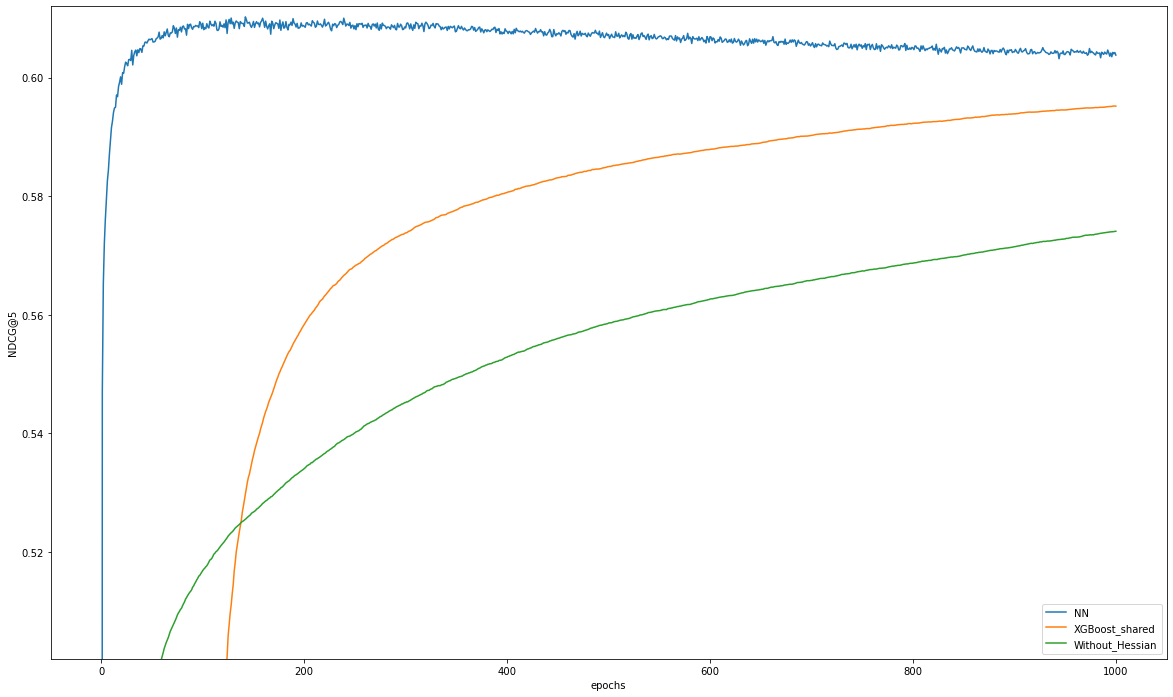

In [6]:
plt.figure(figsize=(20, 12))
plt.plot(
    np.arange(0, 1001), np.mean(np.array(NN_NDCGs), axis=0), label="NN",
)
# plt.plot(
#     np.arange(1, 1001),
#     np.mean(np.array(XGBoost_NDCGs), axis=0),
#     label="XGBoost",
# )
plt.plot(
    np.arange(1, 1001),
    np.mean(np.array(XGBoost_shared_NDCGs), axis=0),
    label="XGBoost_shared",
)
plt.plot(
    np.arange(1, 1001),
    np.mean(np.array(Without_Hessian_NDCGs), axis=0),
    label="Without_Hessian",
)
# plt.axhline(
#     np.max(np.array(lambdamart_NDCGs), axis=1)[0],
#     label="LambdaMART",
#     linestyle="dashed",
# )
plt.ylim(0.502, 0.612)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("NDCG@5")
plt.show()

In [9]:
# Created by Harrie Oosterhuis,
# if you use this for your publication and I'm not a co-author,
# please thank me in the acknowledgements.

import matplotlib.lines as mlines
import pylab as plt

# latex font in matplotlib
plt.rc("font", size=20)
#plt.rc("text", usetex=True)
#plt.rc("text.latex", preamble=r"\usepackage{amsmath,amssymb,bm,bbm,lmodern}")

# parameters for plotting
name_mapping = {
    "method_1": "Neural Networks",
    "method_2": "XGBoost with the Hessian",
    "method_3": "XGBoost without the Hessian",
}
colours = {
    "method_1": "violet",
    "method_2": "red",
    "method_3": "orange",
}
markers = {
    "method_1": "^",
    "method_2": "o",
    "method_3": "v",
}
styles = {
    "method_1": "-",
    "method_2": "-",
    "method_3": "-",
}

legend_info = []
fig = plt.figure(figsize=(6.1, 4.1), linewidth=0.5)
plt.ioff()
# plt.ylabel("Y-Axis Label")
# plt.xlabel("X-Axis Label")
# plt.xscale('log')
# plt.yscale('log')
plt.gca().yaxis.set_ticks_position("both")
plt.xlim(0, 1000)
#plt.xticks([0,100,200,300,400,500,600,700,800,900,1000])
plt.ylim(0.502, 0.612)
# plt.yticks([0,0.25,0.5,0.75,1])

data = {
    "method_1": (np.arange(0, 1001), np.mean(np.array(NN_NDCGs), axis=0)),
    "method_2": (np.arange(1, 1001), np.mean(np.array(XGBoost_shared_NDCGs), axis=0)),
    "method_3": (np.arange(1, 1001), np.mean(np.array(Without_Hessian_NDCGs), axis=0)),
}

for k in ["method_1", "method_2", "method_3"]:
    x, y = data[k]
    legend_info.append(
        {
            "linestyle": styles[k],
            "color": colours[k],
            "marker": markers[k],
            "markersize": 12,
            "markevery": 200,  # this should be higher if you have more data
            "fillstyle": "none",
            "label": name_mapping[k],
            "linewidth": 2.0,
        }
    )

    # for confidence bounds
    # plt.fill_between(x, y_min, y_max)
    #                 alpha=0.2,
    #                 color=legend_info[-1]['color'])
    plt.plot(x, y, **legend_info[-1])

# plt.title('Nice Title')
# in case you do want the legend in the figure
# plt.legend(ncol=2)

plt.savefig("istella_5.pdf", bbox_inches="tight", pad_inches=0)
plt.close()

# in case you want to change the order in the legend but not in the plot
# legend_info = [legend_info[i] for i in [2,0,1]]

figlegend = plt.figure(figsize=(0.5, 0.5))

ncol = 3
figlegend.legend(
    handles=[mlines.Line2D([], [], **l) for l in legend_info],
    fontsize=18,
    loc="center",
    ncol=ncol,
    frameon=False,
    borderaxespad=0,
    borderpad=0,
    labelspacing=0.2,
    columnspacing=1.0,
)
figlegend.savefig(
    "legend.pdf", bbox_inches="tight"
)  # , pad_inches=0)
plt.close()

In [14]:
np.round(np.max(np.array(NN_NDCGs),axis=1),4)

array([0.6106, 0.612 , 0.6096, 0.6125, 0.6121])

In [15]:
np.round(np.mean(np.max(np.array(NN_NDCGs),axis=1)),4)

0.6114

In [16]:
np.round(np.std(np.max(np.array(NN_NDCGs),axis=1)),4)

0.0011

In [5]:
np.round(np.max(np.array(XGBoost_shared_NDCGs),axis=1),4)

array([0.5928, 0.5921, 0.5966, 0.5962, 0.5987])

In [6]:
np.round(np.mean(np.max(np.array(XGBoost_shared_NDCGs),axis=1)),4)

0.5953

In [7]:
np.round(np.std(np.max(np.array(XGBoost_shared_NDCGs),axis=1)),4)

0.0025

In [20]:
np.round(np.max(np.array(Without_Hessian_NDCGs),axis=1),4)

array([0.5757, 0.568 , 0.5789, 0.5716, 0.5763])

In [21]:
np.round(np.mean(np.max(np.array(Without_Hessian_NDCGs),axis=1)),4)

0.5741

In [22]:
np.round(np.std(np.max(np.array(Without_Hessian_NDCGs),axis=1)),4)

0.0038

In [23]:
np.round(np.max(np.array(lambdamart_NDCGs), axis=1),4)

array([0.6554, 0.6554, 0.6554, 0.6554, 0.6554])